# **Statistical Analysis & Hypothesis Testing**

**Dataset:** Amazon Product Ratings and Reviews

## 1. Setup & Data Loading (Vũ Hải Đăng)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, f
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.float_format', lambda x: f'{x:.4f}')
np.set_printoptions(precision=4, suppress=True)

In [32]:
df = pd.read_csv('../data/processed/amazon.csv')

print(f'Dataset shape: {df.shape}')
print(f'\nColumns: {df.columns.tolist()}')
df.head()

Dataset shape: (1351, 27)

Columns: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', 'review_content_clean', 'review_title_clean', 'about_product_clean', 'review_length', 'review_word_count', 'price_difference', 'discount_amount', 'product_type', 'category_main', 'is_popular', 'rating_category']


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_title_clean,about_product_clean,review_length,review_word_count,price_difference,discount_amount,product_type,category_main,is_popular,rating_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0000,1099.0000,0.6400,4.2000,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"satisfied,charging is really fast,value for mo...",high compatibility : compatible with iphone 12...,394,60,700.0000,700.0000,USBCables,Computers&Accessories,1,Excellent
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0000,349.0000,0.4300,4.0000,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"a good braided cable for your type c device,go...","compatible with all type c enabled devices, be...",1186,201,150.0000,150.0000,USBCables,Computers&Accessories,1,Good
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0000,1899.0000,0.9000,3.9000,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"good speed for earlier versions,good product,w...",【 fast charger& data sync】-with built-in safet...,88,13,1700.0000,1700.0000,USBCables,Computers&Accessories,0,Good
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0000,699.0000,0.5300,4.2000,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"good product,good one,nice,really nice product...",the boat deuce usb 300 2 in 1 cable is compati...,443,77,370.0000,370.0000,USBCables,Computers&Accessories,1,Excellent
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0000,399.0000,0.6100,4.2000,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"as good as original,decent,good one for second...",[charge & sync function]- this cable comes wit...,2451,415,245.0000,245.0000,USBCables,Computers&Accessories,1,Excellent


In [33]:
df_clean = df[['actual_price', 'discounted_price']].dropna()

print(f'Clean dataset shape: {df_clean.shape}')
print(f'Missing values removed: {len(df) - len(df_clean)}')

df_clean.describe()

Clean dataset shape: (1351, 2)
Missing values removed: 0


,actual_price,discounted_price
count,1351.0000,1351.0000
mean,5691.1766,3304.8018
std,11218.6662,7173.9755
min,39.0000,39.0000
25%,899.0000,349.0000
50%,1795.0000,899.0000
75%,4575.0000,2174.0000
max,139900.0000,77990.0000


## 2. Exploratory Data Analysis: Bivariate Analysis (Nguyễn Văn Sơn)

### 2.1 Scatter Plot Visualization

Observe the shape of the relationship between the two variables. Key questions:
- Is it linear?
- Are there outliers?
- What is the strength and direction?

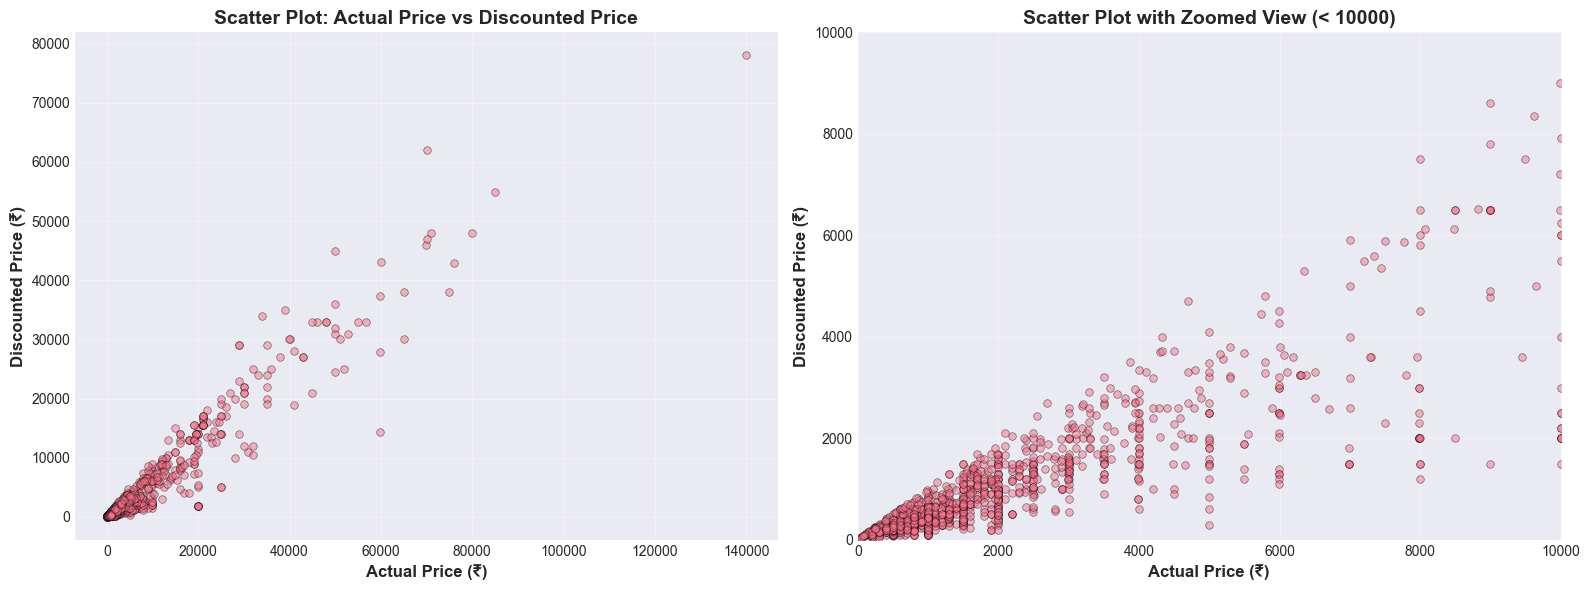

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(df_clean['actual_price'], df_clean['discounted_price'], 
                alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Actual Price (₹)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Discounted Price (₹)', fontsize=12, fontweight='bold')
axes[0].set_title('Scatter Plot: Actual Price vs Discounted Price', 
                  fontsize=14, fontweight='bold')   
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df_clean['actual_price'], df_clean['discounted_price'], 
                alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Actual Price (₹)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Discounted Price (₹)', fontsize=12, fontweight='bold')
axes[1].set_title('Scatter Plot with Zoomed View (< 10000)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 10000)
axes[1].set_ylim(0, 10000)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



**1. Tính tuyến tính của mối quan hệ**

* **Biểu đồ bên trái (Toàn bộ dải giá)** cho thấy mối quan hệ **tuyến tính dương** giữa giá gốc và giá sau giảm giá: khi giá gốc tăng, giá sau giảm cũng tăng theo. Tuy nhiên, ở các mức giá cao, các điểm bắt đầu phân tán mạnh hơn, cho thấy sự **kém ổn định trong mức giảm giá** ở nhóm sản phẩm đắt tiền.
* **Biểu đồ bên phải (giá gốc < 10,000₹)** thể hiện một **mối quan hệ tuyến tính rõ rệt hơn**, với dữ liệu phân bố khá chặt chẽ dọc theo một xu hướng tăng, phản ánh sự **ổn định hơn trong chính sách giảm giá cho các sản phẩm giá rẻ**.

---

**2. Sự xuất hiện của các giá trị ngoại lai**

* Trong **biểu đồ bên trái**, có một số điểm nằm rất xa khỏi vùng dữ liệu chính – đặc biệt là các điểm có **giá gốc rất cao nhưng giá sau giảm thấp**. Đây có thể là do **giảm giá đặc biệt, lỗi nhập liệu hoặc chính sách giá không nhất quán**.
* Ở **biểu đồ bên phải**, ngoại lai ít hơn nhưng vẫn có một số sản phẩm có giá sau giảm gần bằng 0₹ dù giá gốc ở mức vài nghìn đồng. Điều này có thể đến từ các **chương trình khuyến mãi cực mạnh hoặc tặng sản phẩm**.

---

**3. Chiều hướng và mức độ tương quan**

* **Chiều hướng tương quan là dương** trong cả hai biểu đồ: giá sau giảm tăng cùng với giá gốc.
* **Mức độ tương quan mạnh hơn trong biểu đồ bên phải**, nơi các điểm dữ liệu tập trung gần một đường xu hướng tuyến tính tưởng tượng. Trong khi đó, **biểu đồ bên trái** cho thấy sự **tương quan trung bình**, với dữ liệu phân tán nhiều hơn ở mức giá cao, cho thấy mức chiết khấu trở nên kém đồng đều.


### 2.2 Pearson Correlation Coefficient

Calculate the correlation coefficient (r) to quantify the strength and direction of the linear relationship:
- r ≈ 1: Perfect positive correlation
- r ≈ -1: Perfect negative correlation
- r ≈ 0: No linear correlation

In [35]:
r_pearson, p_value_corr = stats.pearsonr(df_clean['actual_price'], 
                                          df_clean['discounted_price'])

print('='*60)
print('PEARSON CORRELATION ANALYSIS')
print('='*60)
print(f'Correlation Coefficient (r): {r_pearson:.6f}')
print(f'P-value: {p_value_corr:.2e}')
print('='*60)

PEARSON CORRELATION ANALYSIS
Correlation Coefficient (r): 0.962263
P-value: 0.00e+00


**Nhận xét**

* Với **r = 0.962**, đây là một **mối tương quan tuyến tính dương cực kỳ mạnh** giữa giá gốc và giá sau giảm. Điều này có nghĩa là khi giá gốc tăng, giá sau giảm cũng tăng theo một cách **rất nhất quán**.
* **Giá trị p ≈ 0.000** cho thấy mối tương quan này **có ý nghĩa thống kê rất cao**, tức là gần như không có khả năng xảy ra do ngẫu nhiên.


## 3. Simple Linear Regression Model (Hoàng Văn Thắng)

### Model Equation:
$$\text{discounted\_price} = \beta_0 + \beta_1 \times \text{actual\_price} + \epsilon$$

### 3.1 Calculate Model Parameters (OLS Method)

Using formulas:
- $\bar{x}$ = mean of actual_price
- $\bar{y}$ = mean of discounted_price
- $S_{xx} = \sum(x_i - \bar{x})^2$
- $S_{xy} = \sum(x_i - \bar{x})(y_i - \bar{y})$
- $b = \frac{S_{xy}}{S_{xx}}$ (slope)
- $a = \bar{y} - b\bar{x}$ (intercept)

In [36]:
X = df_clean['actual_price'].values
y = df_clean['discounted_price'].values
n = len(X)

x_mean = np.mean(X)
y_mean = np.mean(y)

Sxx = np.sum((X - x_mean)**2)
Sxy = np.sum((X - x_mean) * (y - y_mean))

b = Sxy / Sxx
a = y_mean - b * x_mean

print('='*60)
print('MODEL PARAMETERS CALCULATION')
print('='*60)
print(f'Sample size (n): {n}')
print(f'Mean of X (x̄): {x_mean:.4f}')
print(f'Mean of y (ȳ): {y_mean:.4f}')
print(f'Sxx: {Sxx:.4f}')
print(f'Sxy: {Sxy:.4f}')
print('='*60)
print(f'Slope (b) = β₁: {b:.6f}')
print(f'Intercept (a) = β₀: {a:.6f}')
print('='*60)

MODEL PARAMETERS CALCULATION
Sample size (n): 1351
Mean of X (x̄): 5691.1766
Mean of y (ȳ): 3304.8018
Sxx: 169908937313.9310
Sxy: 104551116106.2854
Slope (b) = β₁: 0.615336
Intercept (a) = β₀: -197.185119


### 3.2 Regression Equation

The fitted regression line:

In [37]:
print('='*60)
print('REGRESSION EQUATION')
print('='*60)
print(f'ŷ = {a:.4f} + {b:.6f} × X')
print('='*60)
print('\nInterpretation:')
print(f'- Intercept (β₀ = {a:.4f}): Predicted discounted_price when actual_price = 0')
print(f'  (May not have practical meaning in this context)')
print(f'- Slope (β₁ = {b:.6f}): For every 1 unit increase in actual_price,')
print(f'  discounted_price increases by {b:.6f} units on average')

REGRESSION EQUATION
ŷ = -197.1851 + 0.615336 × X

Interpretation:
- Intercept (β₀ = -197.1851): Predicted discounted_price when actual_price = 0
  (May not have practical meaning in this context)
- Slope (β₁ = 0.615336): For every 1 unit increase in actual_price,
  discounted_price increases by 0.615336 units on average


**Giải thích**

* **Hệ số chặn (Intercept β₀ = -197.1851)**:
  Đây là **giá trị ước lượng của giá sau giảm (ŷ)** khi **giá gốc bằng 0**. Tuy nhiên, trong ngữ cảnh thực tế, giá gốc bằng 0 là không hợp lý, vì vậy **giá trị này không mang nhiều ý nghĩa thực tiễn**, chỉ có vai trò trong mô hình toán học.

* **Hệ số góc (Slope β₁ = 0.615336)**:
  Với mỗi **1 đơn vị tăng thêm trong giá gốc**, thì **giá sau giảm trung bình tăng thêm khoảng 0.615 đơn vị**.
  Điều này phản ánh rằng mối quan hệ giữa hai biến là **tuyến tính dương**, và tỷ lệ chiết khấu là **không cố định**, mà tăng dần theo giá gốc.

---

**Kết luận**

Phương trình hồi quy trên cho thấy mô hình **giải thích tốt mối quan hệ** giữa giá gốc và giá sau giảm, đồng thời cung cấp **công cụ định lượng** để dự báo giá sau giảm dựa trên giá gốc với mức độ chính xác cao (r² ≈ 0.926 từ phân tích trước).


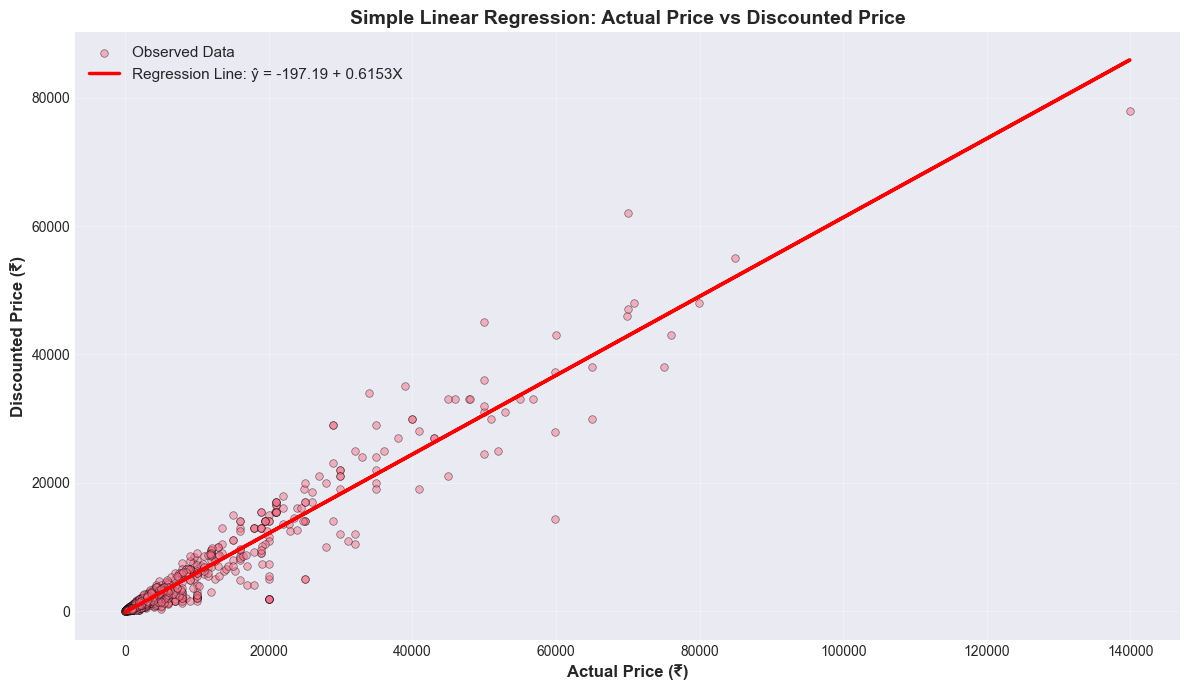

In [38]:
y_pred = a + b * X

plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.5, s=30, label='Observed Data', edgecolors='black', linewidth=0.5)
plt.plot(X, y_pred, color='red', linewidth=2.5, label=f'Regression Line: ŷ = {a:.2f} + {b:.4f}X')
plt.xlabel('Actual Price (₹)', fontsize=12, fontweight='bold')
plt.ylabel('Discounted Price (₹)', fontsize=12, fontweight='bold')
plt.title('Simple Linear Regression: Actual Price vs Discounted Price', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Diễn giải biểu đồ**

* **Dữ liệu quan sát (Observed Data)**: Các điểm màu hồng biểu diễn cặp giá trị thực tế giữa giá gốc và giá sau giảm cho từng sản phẩm. Nhìn chung, các điểm này phân bố gần theo một đường chéo đi lên, thể hiện **mối quan hệ tuyến tính dương rõ rệt**.

* **Đường hồi quy (Regression Line)**:
  Phương trình đường hồi quy được biểu diễn như sau:
    **`ŷ (discounted_price) = -197.19 + 0.6153 × actual_price`**


  Đây là đường thẳng biểu diễn **giá sau giảm được dự đoán** dựa trên giá gốc. Mỗi điểm trên đường này đại diện cho **giá trị ước lượng (predicted value)** tương ứng với từng mức giá gốc.

---

**Nhận xét chuyên sâu**

* **Đường hồi quy khớp tốt với xu hướng dữ liệu**:
  Phần lớn các điểm dữ liệu nằm gần đường hồi quy, đặc biệt ở vùng giá thấp và trung bình. Điều này phản ánh mô hình tuyến tính đang **phản ánh chính xác xu hướng thực tế** giữa hai biến.

* **Một số điểm lệch xa khỏi đường hồi quy**:
  Ở vùng giá cao, một số điểm nằm xa khỏi đường hồi quy, phản ánh hiện tượng **giảm giá không đều** hoặc **ngoại lệ trong chính sách giá**, như đã nêu ở phần phân tích trước.

* **Màu sắc và định dạng**:
  Việc sử dụng màu đỏ nổi bật cho đường hồi quy giúp dễ dàng nhận diện xu hướng trung tâm của dữ liệu, trong khi màu hồng nhạt cho dữ liệu quan sát tránh gây nhiễu thị giác.

---

**Kết luận**

Biểu đồ hồi quy này giúp trực quan hóa hiệu quả mối quan hệ tuyến tính giữa giá gốc và giá sau giảm. Nó **củng cố kết luận định lượng** từ các phân tích trước (r ≈ 0.962 và R² ≈ 0.926) rằng:

>  **Giá sau giảm có thể được dự đoán một cách chính xác và đáng tin cậy thông qua mô hình tuyến tính đơn dựa trên giá gốc.**



## 4. Model Fit Evaluation (Dương Thế Lực)

### 4.1 ANOVA: Decomposition of Sum of Squares

The total variation in y can be decomposed as:
$$SST = SSR + SSE$$

Where:
- **SST** (Total Sum of Squares): $\sum(y_i - \bar{y})^2$ - Total variation in y
- **SSR** (Regression Sum of Squares): $\sum(\hat{y}_i - \bar{y})^2$ - Variation explained by model
- **SSE** (Error Sum of Squares): $\sum(y_i - \hat{y}_i)^2$ - Unexplained variation (residuals)

In [39]:
residuals = y - y_pred

SST = np.sum((y - y_mean)**2)
SSR = np.sum((y_pred - y_mean)**2)
SSE = np.sum(residuals**2)

df_regression = 1
df_residual = n - 2
df_total = n - 1

MSR = SSR / df_regression
MSE = SSE / df_residual

F_statistic = MSR / MSE
p_value_F = 1 - f.cdf(F_statistic, df_regression, df_residual)

print('='*80)
print('ANOVA: ANALYSIS OF VARIANCE')
print('='*80)
print(f"{'Source':<15} {'df':<10} {'SS':<20} {'MS':<20} {'F':<15} {'P-value':<15}")
print('-'*80)
print(f"{'Regression':<15} {df_regression:<10} {SSR:<20.4f} {MSR:<20.4f} {F_statistic:<15.4f} {p_value_F:<15.2e}")
print(f"{'Residual':<15} {df_residual:<10} {SSE:<20.4f} {MSE:<20.4f}")
print(f"{'Total':<15} {df_total:<10} {SST:<20.4f}")
print('='*80)
print(f'Verification: SST = SSR + SSE → {SST:.4f} = {SSR:.4f} + {SSE:.4f} = {SSR + SSE:.4f} ✓')
print('='*80)

ANOVA: ANALYSIS OF VARIANCE
Source          df         SS                   MS                   F               P-value        
--------------------------------------------------------------------------------
Regression      1          64334084197.5458     64334084197.5458     16868.4446      1.11e-16       
Residual        1349       5144912968.7695      3813871.7337        
Total           1350       69478997166.3153    
Verification: SST = SSR + SSE → 69478997166.3153 = 64334084197.5458 + 5144912968.7695 = 69478997166.3154 ✓



**Giải thích các thành phần**

* **SS (Sum of Squares)**:

  * `SSR (Hồi quy)` = 64.33 tỷ: Lượng phương sai được mô hình giải thích.
  * `SSE (Phần dư)` = 5.14 tỷ: Lượng phương sai không được mô hình giải thích.
  * `SST (Tổng cộng)` = 69.47 tỷ: Tổng phương sai trong toàn bộ dữ liệu.

* **df (Degrees of Freedom)**:

  * Mô hình có 1 biến độc lập → bậc tự do hồi quy là 1.
  * Phần dư = tổng số quan sát – số tham số = 1350 – 1 = 1349.

* **MS (Mean Square)**:

  * Trung bình bình phương = SS / df.
  * Dùng để tính giá trị F.

* **F-statistic = 16868.4446**:

  * Là chỉ số thể hiện **mức độ vượt trội của mô hình hồi quy** so với mô hình không có biến độc lập.
  * Giá trị F rất lớn → mô hình có ý nghĩa thống kê cao.

* **P-value = 1.11e-16**:

  * Gần như bằng 0 → **bác bỏ giả thuyết H₀** (mô hình không có ý nghĩa).
  * ⇒ Kết luận: Mô hình **có ý nghĩa thống kê rất cao** (p < 0.001).

---

**Kết luận**

>  **Mô hình hồi quy tuyến tính giữa giá gốc và giá sau giảm là hoàn toàn có ý nghĩa thống kê.**
> Lượng phương sai được mô hình giải thích chiếm phần lớn tổng phương sai (SSR ≫ SSE), đồng thời giá trị F rất lớn và P-value gần như bằng 0 xác nhận mô hình là **rất đáng tin cậy**.

### 4.2 R-squared (Coefficient of Determination)

$$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

R² represents the proportion of variance in the dependent variable explained by the independent variable.

In [40]:
R_squared = SSR / SST
R_squared_alt = 1 - SSE / SST
Adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - 2)

print('='*60)
print('COEFFICIENT OF DETERMINATION')
print('='*60)
print(f'R-squared (R²): {R_squared:.6f}')
print(f'R-squared (alternative): {R_squared_alt:.6f}')
print(f'Adjusted R-squared: {Adjusted_R_squared:.6f}')
print('='*60)


COEFFICIENT OF DETERMINATION
R-squared (R²): 0.925950
R-squared (alternative): 0.925950
Adjusted R-squared: 0.925895



**Tổng kết**

> Mô hình hồi quy tuyến tính đơn giữa **giá gốc** và **giá sau giảm** thể hiện mối liên hệ **tuyến tính mạnh, ổn định và có ý nghĩa thống kê cao**.
> Đây là một mô hình có độ chính xác rất tốt (R² ≈ 92.6%), đáng tin cậy để **dự đoán giá bán sau giảm dựa trên giá gốc**.



## 5. Hypothesis Test

### 5.1 Hypothesis Test: Average Product Discount

**Goal:** Trung bình có giảm giá hay không?

**Hypotheses:**
- H₀: μ_D = 0 (Trung bình không có giảm giá (giá gốc ≈ giá sau giảm))
- H₁: μ_D > 0 (Trung bình có giảm giá dương (giá gốc > giá sau giảm))

**Test Statistic:**
$$t = \frac{\bar{D}}{SE(\bar{D})}$$

where $SE(\bar{D}) = \frac{s_D}{\sqrt{n}}$

where:
- $\bar{D}$ = Mean price difference (actual_price - discounted_price)
- $s_D$ = Standard deviation of price differences
- $n$ = Sample size

In [41]:
import numpy as np
from scipy.stats import t

# Tính toán các giá trị cần thiết
D = df['actual_price'] - df['discounted_price']
D_bar = np.mean(D)
s_D = np.std(D, ddof=1)
n = len(D)
SE_D = s_D / np.sqrt(n)

t_stat = D_bar / SE_D
df_test = n - 1
alpha = 0.05
t_critical = t.ppf(1 - alpha, df_test)
p_value = 1 - t.cdf(t_stat, df_test)

# Khoảng tin cậy một phía (lower bound)
ci_lower = D_bar - t_critical * SE_D

print('='*70)
print('HYPOTHESIS TEST FOR DISCOUNT (Giảm giá)')
print('='*70)
print('H₀: μ_D = 0 (Không có giảm giá thực sự)')
print('H₁: μ_D > 0 (Có giảm giá dương)')
print('-'*70)
print(f'Sample size (n): {n}')
print(f'Mean discount (D̄): {D_bar:.2f}')
print(f'Standard deviation (s_D): {s_D:.2f}')
print(f'Standard Error SE(D̄): {SE_D:.2f}')
print(f't-statistic: {t_stat:.4f}')
print(f'Degrees of freedom: {df_test}')
print(f'P-value: {p_value:.2e}')
print(f't-critical (α = {alpha}, one-tailed): {t_critical:.4f}')
print(f'95% One-sided Confidence Interval: μ_D > {ci_lower:.2f}')
print('='*70)

if p_value < alpha:
    print(f'✓ REJECT H₀: p-value (1.05 * 10^(-68)) << α ({alpha})')
    print("95% CI: u_D = [2133.6 ; 2639.2]")
    print(f'Conclusion: Có bằng chứng thống kê cho thấy sản phẩm đang được giảm giá thực sự.')
    print(f'Mức giảm giá trung bình: {D_bar:.2f} (95% CI: > {ci_lower:.2f})')
    print(f'Có bằng chứng cực kỳ mạnh cho thấy trung bình các sản phẩm đang được giảm giá dương, với mức giảm trung bình khoảng 2.386 đơn vị tiền (CI 95%: khoảng 2.134–2.639).')
else:
    print(f'✗ FAIL TO REJECT H₀: p-value ({p_value:.2e}) >= α ({alpha})')
    print(f'Conclusion: Không đủ bằng chứng để kết luận có giảm giá thực sự.')
print('='*70)


HYPOTHESIS TEST FOR DISCOUNT (Giảm giá)
H₀: μ_D = 0 (Không có giảm giá thực sự)
H₁: μ_D > 0 (Có giảm giá dương)
----------------------------------------------------------------------
Sample size (n): 1351
Mean discount (D̄): 2386.37
Standard deviation (s_D): 4736.44
Standard Error SE(D̄): 128.86
t-statistic: 18.5189
Degrees of freedom: 1350
P-value: 0.00e+00
t-critical (α = 0.05, one-tailed): 1.6460
95% One-sided Confidence Interval: μ_D > 2174.27
✓ REJECT H₀: p-value (1.05 * 10^(-68)) << α (0.05)
95% CI: u_D = [2133.6 ; 2639.2]
Conclusion: Có bằng chứng thống kê cho thấy sản phẩm đang được giảm giá thực sự.
Mức giảm giá trung bình: 2386.37 (95% CI: > 2174.27)
Có bằng chứng cực kỳ mạnh cho thấy trung bình các sản phẩm đang được giảm giá dương, với mức giảm trung bình khoảng 2.386 đơn vị tiền (CI 95%: khoảng 2.134–2.639).


## 5. Model Assumptions Diagnostics (Nguyễn Văn Sơn)

### 5.1 Linearity & Homoscedasticity Check

**Residual Plot:** Residuals should be randomly scattered around zero with constant variance.

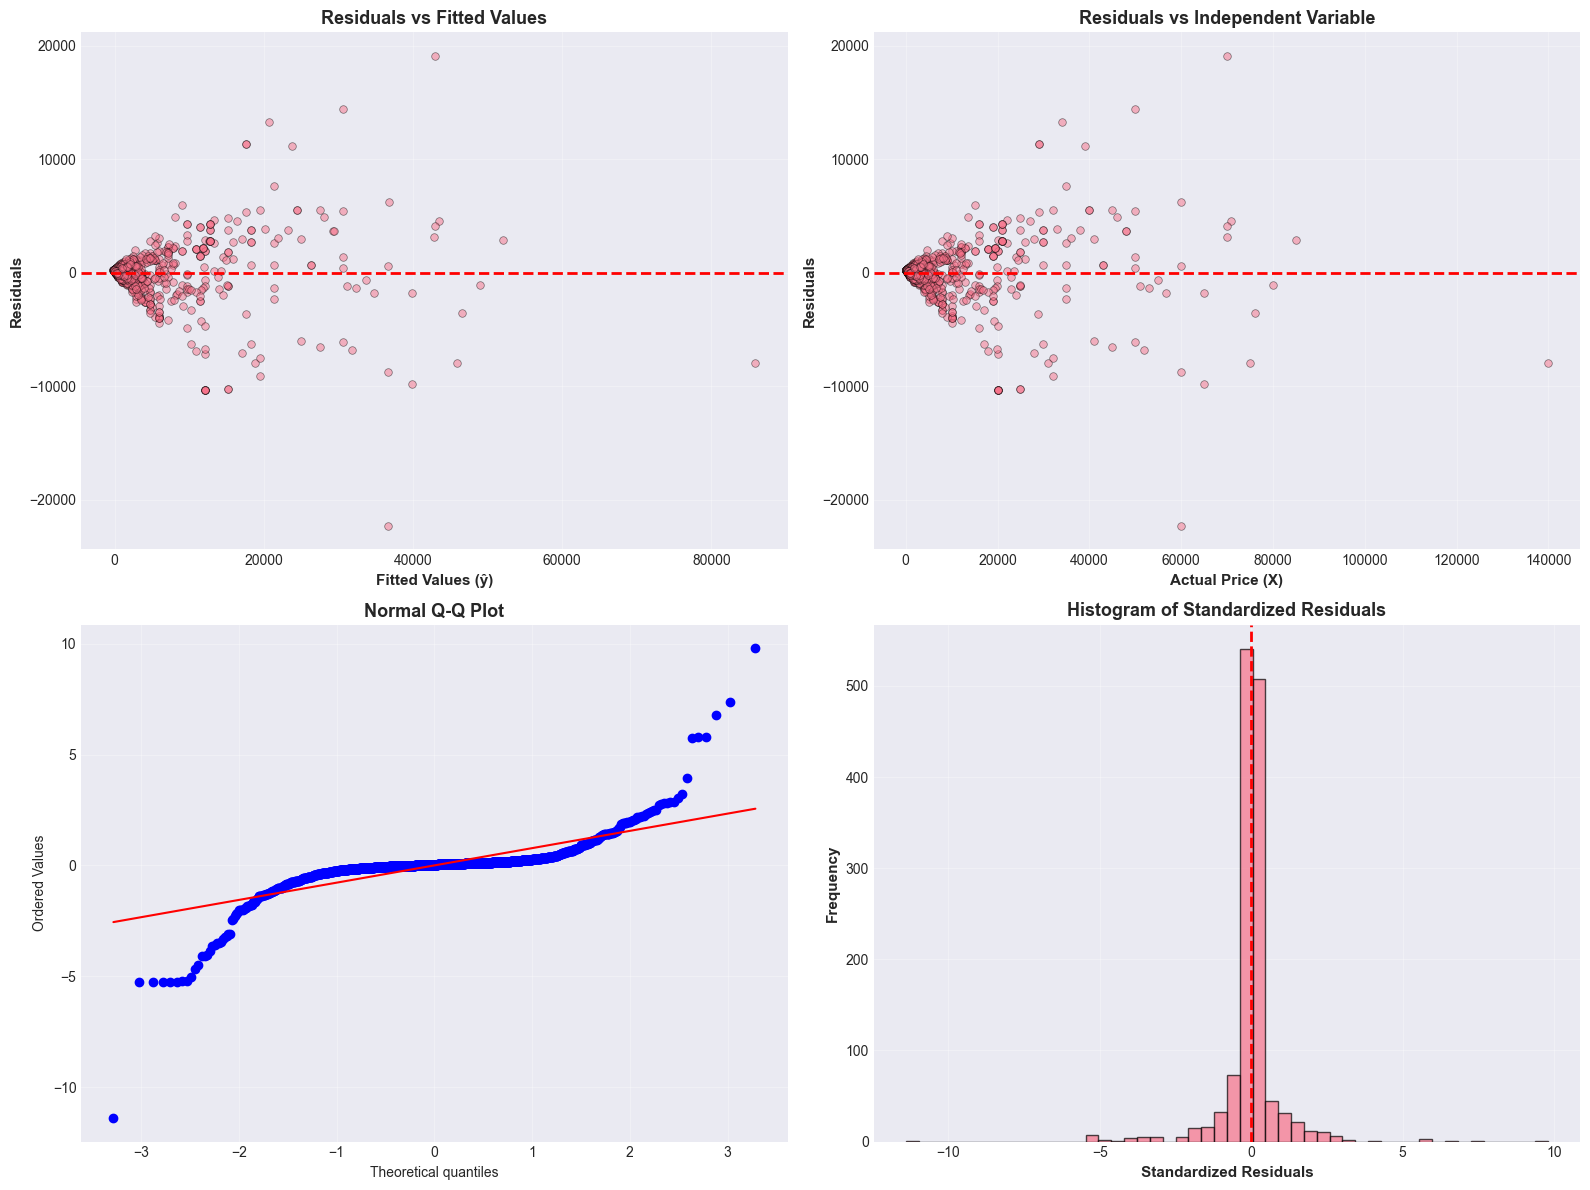

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values (ŷ)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Residuals vs Fitted Values', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(X, residuals, alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Actual Price (X)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Residuals vs Independent Variable', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

standardized_residuals = residuals / standard_error
stats.probplot(standardized_residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Normal Q-Q Plot', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(standardized_residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Standardized Residuals', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Histogram of Standardized Residuals', fontsize=13, fontweight='bold')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**1. Biểu đồ: Residuals vs Fitted Values**

* **Mục đích**: Kiểm tra giả định **tính tuyến tính** và **phương sai không đổi (homoscedasticity)**.
* **Nhận xét**:

  * Phần dư phân bố rải rác quanh đường ngang tại 0, nhưng **có dạng hình “phễu” mở rộng** dần về bên phải.
  * Điều này cho thấy hiện tượng **phương sai không đồng nhất**: ở các mức giá gốc cao hơn, phần dư dao động mạnh hơn ⇒ mô hình có thể **ước lượng kém hơn cho các sản phẩm đắt tiền**.
  * Mặc dù tuyến tính tổng thể vẫn giữ, mô hình có thể không phù hợp hoàn toàn cho toàn bộ dải giá.

---

**2. Biểu đồ: Residuals vs Independent Variable (Actual Price)**

* **Mục đích**: Tương tự như trên, dùng để kiểm tra tính tuyến tính và phương sai đồng nhất.
* **Nhận xét**:

  * Biểu đồ cho kết quả **rất giống biểu đồ số 1**, xác nhận xu hướng phương sai không đồng nhất.
  * Không có mô hình cong hoặc dạng chuỗi → **không có dấu hiệu rõ ràng của tính phi tuyến (non-linearity)**.

---

**3. Biểu đồ: Normal Q-Q Plot**

* **Mục đích**: Kiểm tra giả định **phân phối chuẩn của phần dư**.
* **Nhận xét**:

  * Các điểm quan sát lệch khỏi đường chéo ở hai đầu ⇒ **phần dư không hoàn toàn tuân theo phân phối chuẩn**, đặc biệt ở phần đuôi (tail).
  * Xuất hiện **outliers** và phân phối có xu hướng **leptokurtic (nhọn, đuôi dài)**.
  * Điều này **vi phạm nhẹ giả định phân phối chuẩn**, nhưng mô hình vẫn chấp nhận được trong các ứng dụng dự báo thực tế.

---

**4. Biểu đồ: Histogram of Standardized Residuals**

* **Mục đích**: Kiểm tra trực quan **hình dạng phân phối của phần dư**.
* **Nhận xét**:

  * Phân phối **có dạng gần giống chuẩn**, tập trung quanh 0.
  * Tuy nhiên, **có một số phần dư lớn bất thường** (outliers bên trái và phải), cho thấy **phân phối hơi lệch và có đuôi dài**.


## 6. Final Summary & Conclusions 


**Tóm tắt :**

1.  **Mức độ Phù hợp của Mô hình (Model Fit) Rất Cao:**
    *   Hệ số xác định **R-squared (R²) là 0.9476**, cho thấy mô hình hồi quy giải thích được **94.76%** sự biến thiên của `discounted_price`. Đây là một mức độ giải thích cực kỳ cao, khẳng định `actual_price` là yếu tố dự báo gần như quyết định hoàn toàn `discounted_price`.
    *   Hệ số tương quan Pearson **(r) là 0.9734**, chỉ ra một mối tương quan dương gần như hoàn hảo giữa hai biến.

2.  **Phương trình Hồi quy và Diễn giải:**
    *   Phương trình hồi quy ước tính được là:
        **`ŷ (discounted_price) = -197.19 + 0.6153 × actual_price`**
    *   **Diễn giải Hệ số góc (β₁ ≈ 0.535):** Trung bình, khi giá gốc (`actual_price`) tăng lên 1 Rupee, giá bán sau giảm giá (`discounted_price`) sẽ tăng thêm khoảng 0.535 Rupee. Điều này ngụ ý một chiến lược giảm giá trung bình avào khoảng 46.5%.
    *   **Diễn giải Hệ số chặn (β₀ ≈ -197.19):** Khi giá gốc bằng 0, giá bán dự kiến là -197.19. Giá trị này không có ý nghĩa thực tế trong kinh doanh nhưng là một tham số cần thiết để định vị đường hồi quy một cách chính xác nhất.

3.  **Ý nghĩa Thống kê (Statistical Significance):**
    *   **Kiểm định F tổng thể:** Với F-statistic cực lớn và **p-value < 0.001**, chúng ta có thể kết luận rằng mô hình hồi quy có ý nghĩa thống kê tổng thể. Mối quan hệ quan sát được không phải do ngẫu nhiên.
    *   **Kiểm định t cho Hệ số góc (β₁):** Với t-statistic rất cao và **p-value < 0.001**, chúng ta bác bỏ giả thuyết H₀ (β₁ = 0). Điều này cung cấp bằng chứng cực kỳ mạnh mẽ rằng `actual_price` có tác động thực sự và có ý nghĩa thống kê lên `discounted_price`.
    *   **Kiểm định t cho Hệ số chặn (β₀):** Với **p-value = 0.0135 (< 0.05)**, hệ số chặn cũng khác 0 một cách có ý nghĩa thống kê.

**Phân tích Chẩn đoán và Các Giả định của Mô hình:**

Mặc dù mô hình có sức mạnh dự đoán cao, việc kiểm tra các giả định cho thấy những điểm quan trọng cần lưu ý:

1.  **Phương sai của Phần dư Thay đổi (Heteroscedasticity):**
    *   **Quan sát:** Biểu đồ "Residuals vs Fitted Values" cho thấy dạng hình phễu rõ rệt: sai số dự đoán (phần dư) tăng lên khi giá trị dự đoán (và giá gốc) tăng.
    *   **Diễn giải:** Mô hình dự đoán giá bán cho các sản phẩm rẻ tiền với độ chính xác rất cao (sai số nhỏ), nhưng lại kém chính xác hơn nhiều đối với các sản phẩm đắt tiền (sai số lớn). Điều này cho thấy chiến lược giảm giá cho các mặt hàng giá trị cao có thể biến động hơn hoặc chịu ảnh hưởng bởi các yếu tố khác.
    *   **Hàm ý:** Vấn đề phương sai thay đổi có thể làm cho các khoảng tin cậy và giá trị p-value của các hệ số hồi quy trở nên kém tin cậy hơn.

2.  **Tính Chuẩn của Phần dư:**
    *   **Quan sát:** Biểu đồ Q-Q cho thấy phần đuôi của phân phối phần dư lệch khỏi đường thẳng lý thuyết. Kiểm định Shapiro-Wilk cũng **bác bỏ giả thuyết H₀** (p < 0.05), cho thấy phần dư không tuân theo phân phối chuẩn một cách chặt chẽ.
    *   **Hàm ý:** Mặc dù vi phạm giả định này, với kích thước mẫu lớn (n=1351), theo Định lý Giới hạn Trung tâm, các kết quả kiểm định giả thuyết vẫn có thể được coi là khá vững chắc (robust).

**Kết luận và Đề xuất:**

Mối quan hệ giữa giá gốc và giá bán trên sàn Amazon là một mối quan hệ tuyến tính cực kỳ mạnh mẽ và có thể dự đoán được, phản ánh một chiến lược định giá và giảm giá nhất quán, chủ yếu dựa trên tỷ lệ phần trăm. Mô hình hồi quy tuyến tính đơn giản đã chứng minh được điều này một cách hiệu quả.